In [18]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [19]:
#Generate random data for dogs and cats
np.random.seed(0)

In [20]:
# Dogs: higher flappiness index, lower whisker length
dogs_whiskers_length = np.random.normal(loc=5, scale=1, size=1000)
dogs_flappliness_index = np.random.normal(loc=8, scale=1, size=1000)

In [21]:
# Cats: Lower flappiness index, Higher whisker length
cats_whisker_lenght = np.random.normal(loc=8, scale=1, size=1000)
cats_flappiness_index = np.random.normal(loc=5, scale=1, size=1000)

In [22]:
# Combine Data
data_dogs=np.vstack((dogs_whiskers_length,dogs_flappliness_index)).T
data_cats=np.vstack((cats_whisker_lenght,cats_flappiness_index)).T
data=np.vstack((data_dogs,data_cats))
labels=np.hstack((np.zeros(len(data_dogs)),np.ones(len(data_cats))))

In [23]:
labels

array([0., 0., 0., ..., 1., 1., 1.], shape=(2000,))

In [24]:
# Devide thetesting and training data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

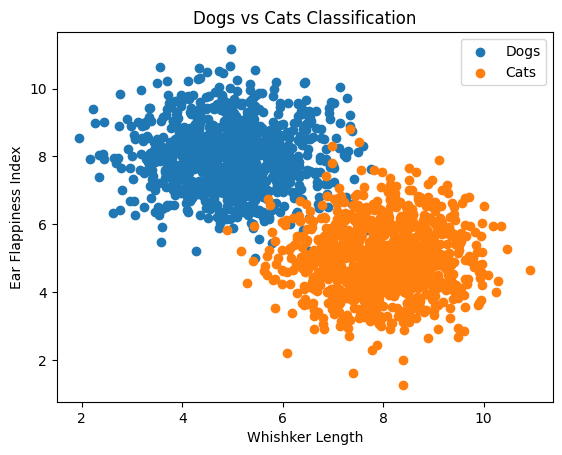

In [25]:
# Plot the training data
plt.scatter(dogs_whiskers_length,dogs_flappliness_index, label="Dogs")
plt.scatter(cats_whisker_lenght,cats_flappiness_index, label="Cats")
plt.xlabel("Whishker Length")
plt.ylabel("Ear Flappiness Index")
plt.legend()
plt.title("Dogs vs Cats Classification")
plt.show()

In [26]:
# Implementing random linear classifier algo
def linear_regression(data_dogs, data_cats,k,d):
    # d is the number of features (whisker length, ear flappiness index)
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        error=compute_error(data_dogs,data_cats, theta, theta0)
        if error<best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta,best_theta0,best_error

# Computing the error
def compute_error(data_dogs, data_cats, theta,theta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0 <= 0:
            error+=1
    for x_cats in data_cats:
        if np.dot(theta,x_cats)+theta0 > 0:
            error+=1
    return error
    
    

In [27]:
# Definfing cross validation 
def cross_validate(data_dogs,data_cats,k_values,d,n_splits=5):
    kf=KFold(n_splits=n_splits,shuffle=True,random_state=42)
    avg_errors=[]
    for k in k_values:
        errors=[]
        for train_index,val_index in kf.split(data_dogs):
            X_train_fold=np.vstack((data_dogs[train_index],data_cats[train_index]))
            y_train_fold=np.hstack((np.zeros(len(train_index)),np.ones(len(train_index))))
            x_vals_fold=np.vstack((data_dogs[val_index],data_cats[val_index]))
            y_val_fold=np.hstack((np.zeros(len(val_index)),np.ones(len(val_index))))

            best_theta_fold,best_theta0_fold,error=linear_regression(X_train_fold[y_train_fold==0],X_train_fold[y_train_fold==1],k,d)
            errors.append(compute_error(x_vals_fold[y_val_fold==0],x_vals_fold[y_val_fold==1],best_theta_fold,best_theta0_fold))
        avg_errors.append(np.mean(errors))
    best_k=k_values[np.argmin(avg_errors)]
    return best_k
k_values=[1,2,20,100,200,300,400,1000]
best_k=cross_validate(data_dogs,data_cats,k_values,d=2)
print(f"Best valus of k:{best_k}")

Best valus of k:200


In [28]:
k=best_k
d=2 
best_theta_train,best_theta0_train, train_error=linear_regression(X_train[y_train==0], X_train[y_train==1],k,d)

In [29]:
# plot decision boundary
x_vals=np.linspace(2,10,100)
y_vals=(-best_theta_train[0] / best_theta_train[1]) * x_vals - (best_theta0_train / best_theta_train[1])

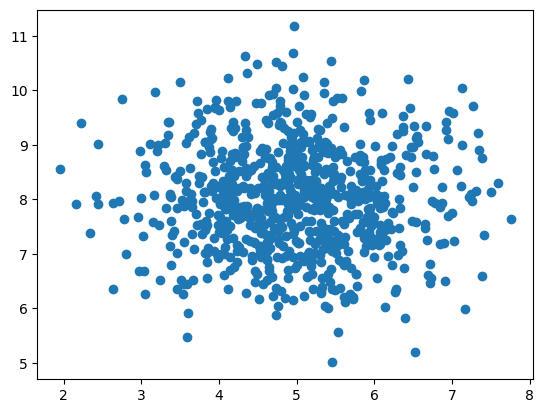

In [30]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1], label="Dogs - Train")

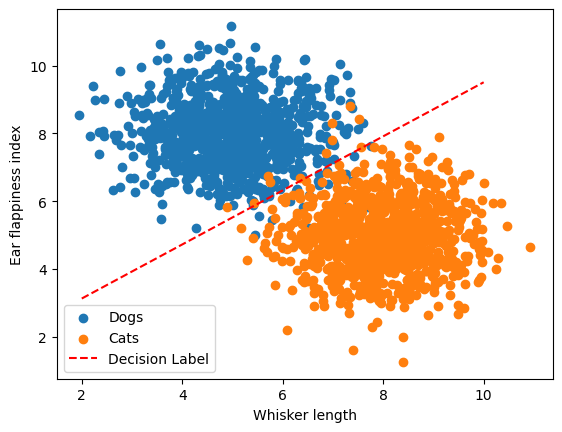

In [31]:
plt.scatter(dogs_whiskers_length,dogs_flappliness_index, label="Dogs")
plt.scatter(cats_whisker_lenght,cats_flappiness_index, label="Cats")
plt.plot(x_vals,y_vals, color="red", linestyle="--", label="Decision Label")
plt.ylabel("Ear flappiness index")
plt.xlabel("Whisker length")
plt.legend()
plt.show()


In [32]:
# Print Training error
print("Training error", train_error)

Training error 26


In [33]:
#Compute testing error
test_error=compute_error(X_test[y_test==0],X_test[y_test==1],best_theta_train,best_theta0_train)
print("Testing Error",test_error)

Testing Error 6


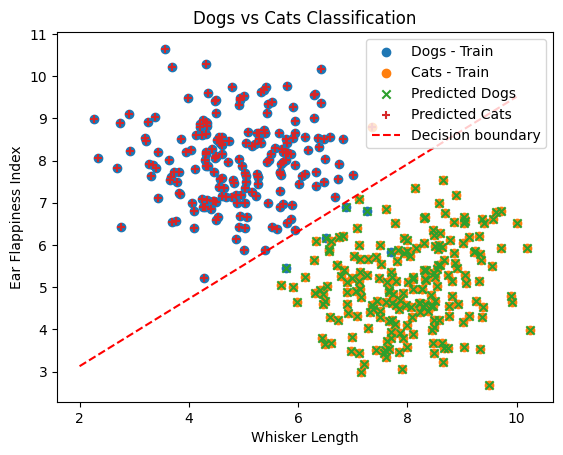

In [34]:
# Plot the actual test data and predicted test data
plt.scatter(X_test[y_test==0][:,0],X_test[y_test==0][:,1], label="Dogs - Train")
plt.scatter(X_test[y_test==1][:,0],X_test[y_test==1][:,1], label="Cats - Train")

# Predict test data points using the decision boundary
predicted_labels=np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train,x_test) + best_theta0_train > 0:
        predicted_labels[i]=1

#plot predicted test data points
plt.scatter(X_test[predicted_labels == 0][:,0], X_test[predicted_labels == 0][:,1] , marker='x',label="Predicted Dogs" )
plt.scatter(X_test[predicted_labels == 1][:,0], X_test[predicted_labels == 1][:,1] , marker='+',label="Predicted Cats" )

# Plot decision Boundary
plt.plot(x_vals,y_vals, color="red",linestyle="--", label= "Decision boundary")

plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dogs vs Cats Classification")
plt.legend()
plt.show()